In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

2 --> 21.611198077291412
0 --> 126.25480186404832
0 --> 43.60917207687507
1 --> 269.3588822525138
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 21.134936857227387
0 --> 24.456273631792392
2 --> 9.089353351335738
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 37.8430996501672
1 --> 57.331455917267235
1 --> 50.4615072543077
2 --> 36.64804988779894


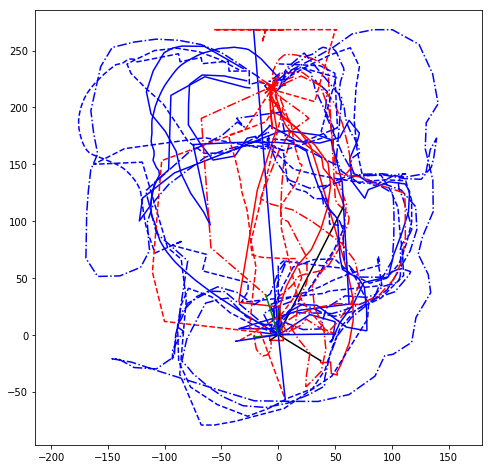

In [124]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'k',
              '1': 'blue',
              '2': 'green'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv, positions):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='blue', ls=ls_dict[exp_type])
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='red', ls=ls_dict[exp_type])
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type])
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
#plt.legend()

In [110]:
results = pd.DataFrame(np.array([types, errs, times, times_return]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_times'])

In [111]:
results.groupby('group')['time'].mean()

group
0.0     94.294487
1.0    162.675400
2.0    101.828812
Name: time, dtype: float32

In [112]:
results.groupby('group')['return_times'].mean()

group
0.0    36.697990
1.0    81.765175
2.0    37.566143
Name: return_times, dtype: float32

In [113]:
results.groupby('group')['err'].mean()

group
0.0    50.741875
1.0    85.925018
2.0    17.800594
Name: err, dtype: float32

In [114]:
results.groupby('group').count()

,err,time,return_times
group,,,
0.0,4,4,4
1.0,5,5,5
2.0,6,6,6


In [193]:
h = headings_csv[3]

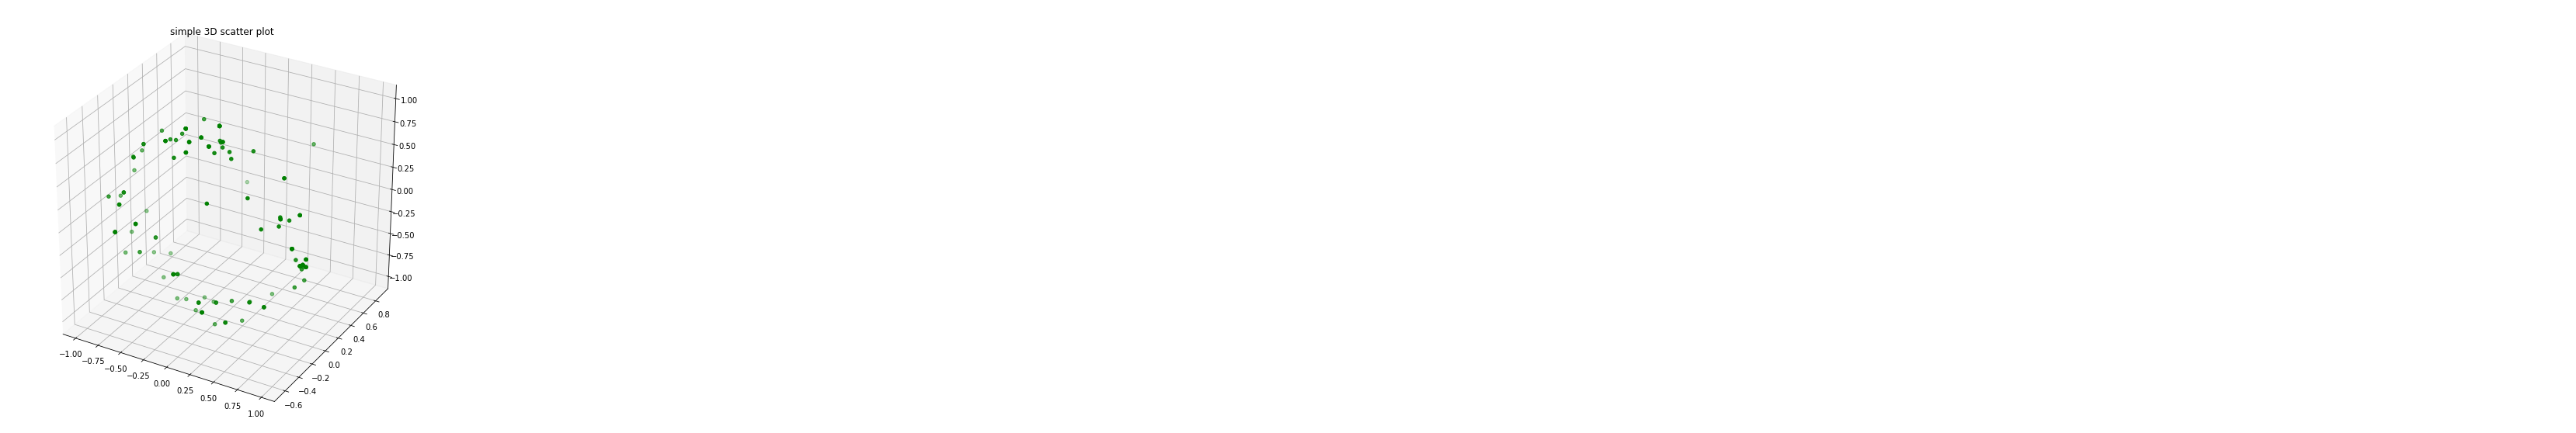

In [196]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.x, h.y, h.z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

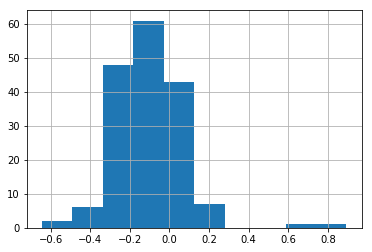

In [197]:
h.y.hist()

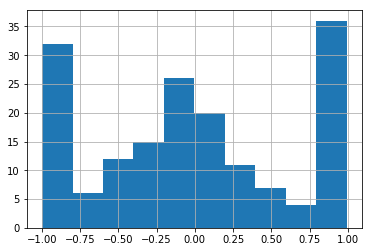

In [198]:
h.x.hist()

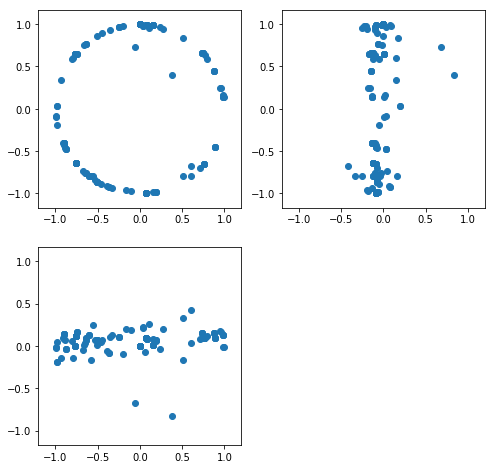

In [232]:
lim = 1.2
plt.figure(figsize=(8, 8))
plt.subplot(222)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.subplot(221)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.subplot(223)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)

In [200]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(y/z)
    phi = np.arctan(np.sqrt(x**2 + y**2)/z)
    return theta, phi

In [201]:
theta, phi = cart_to_spherical(h.x, h.y, h.z)

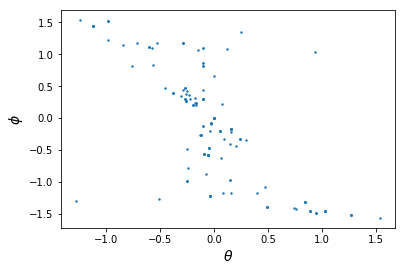

In [202]:
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.scatter(theta, phi, s=2)

In [205]:
def myplot(x, y, s, bins=300):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

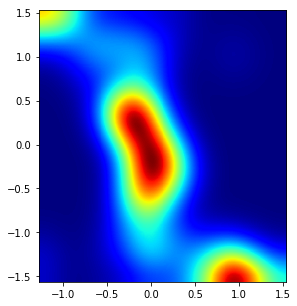

In [208]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(theta, phi, 40, bins=500)
plt.figure(figsize=(9, 5))
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [214]:
stats.entropy(img.ravel())

11.700791817183019

In [215]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

In [216]:
calculate_entropy(h.x, h.y, h.z)

10.975474352328774

0 ---> 11.165921961797292


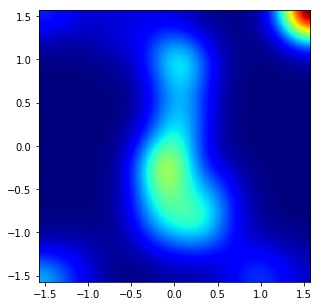

2 ---> 10.8649732186169


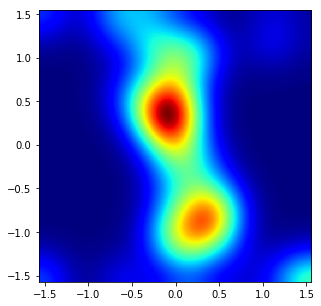

0 ---> 11.062176093608144


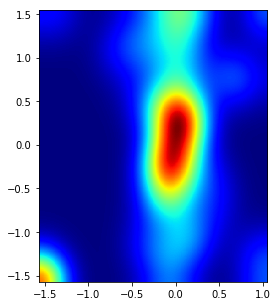

1 ---> 10.975474352328774


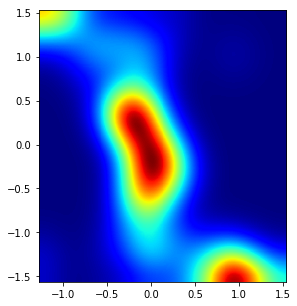

2 ---> 10.941420510467442


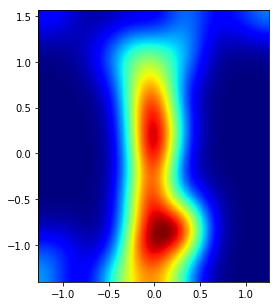

1 ---> 10.833048383014589


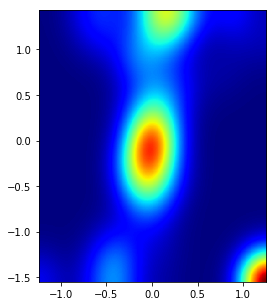

0 ---> 10.905028618402955


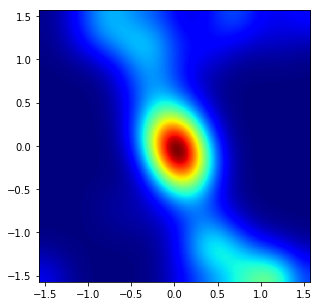

1 ---> 10.972576038845189


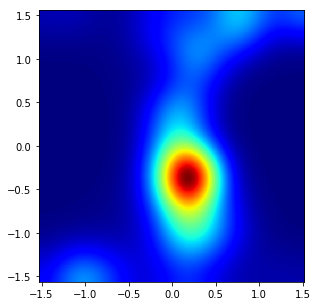

2 ---> 10.907280600736325


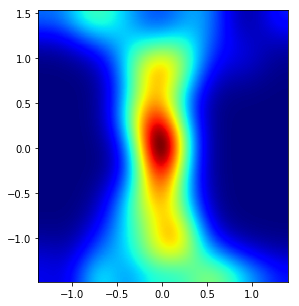

2 ---> 10.904988521880437


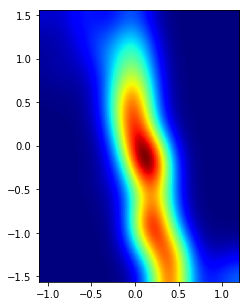

0 ---> 11.057349005695713


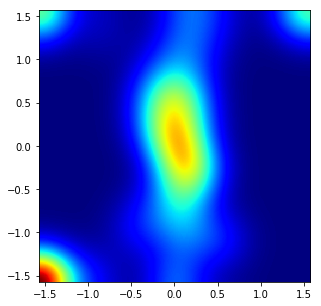

1 ---> 11.137560462603513


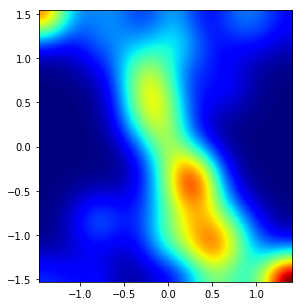

2 ---> 10.821226775060612


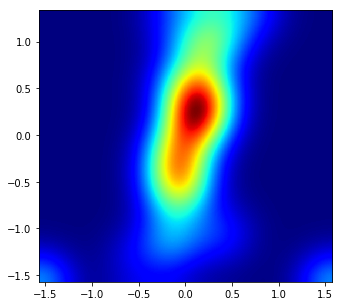

1 ---> 10.756142485645624


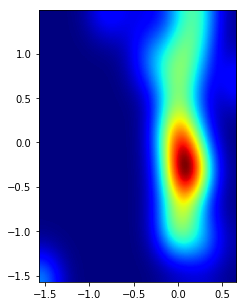

2 ---> 10.874361161754493


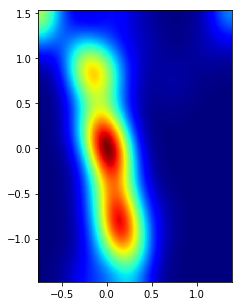

In [233]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h.x, h.y, h.z)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.y, h.z)
    img, extent = myplot(t, p, 40, bins=500)
    plt.figure(figsize=(9, 5))
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)

In [228]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [229]:
entropies.groupby('group')['H'].mean()

group
0.0    11.047619
1.0    10.934960
2.0    10.885708
Name: H, dtype: float64